In [7]:
import pandas as pd

df = pd.read_csv('../data/Fashion_Retail_Sales.csv', delimiter=',', encoding='utf-8')

# Convert date column
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], dayfirst=True, errors='coerce')

# Create Total Purchase column (can be same as amount unless adding tax/shipping later)
df['Total Purchase'] = df['Purchase Amount (USD)']

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill missing review rating with average
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

# Preview cleaned data
df.head()




Missing values per column:
Customer Reference ID       0
Item Purchased              0
Purchase Amount (USD)     650
Date Purchase            2051
Review Rating             324
Payment Method              0
Total Purchase            650
dtype: int64


C:\Users\kared\AppData\Local\Temp\ipykernel_48796\2010999241.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Total Purchase
0,4018,Handbag,4619.0,2023-02-05,2.999057,Credit Card,4619.0
1,4115,Tunic,2456.0,2023-07-11,2.000000,Credit Card,2456.0
2,4019,Tank Top,2102.0,NaT,4.100000,Cash,2102.0
3,4097,Leggings,3126.0,NaT,3.200000,Cash,3126.0
4,3997,Wallet,3003.0,NaT,4.700000,Cash,3003.0


In [14]:
import sys
!{sys.executable} -m pip install matplotlib seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     -------------------------------------- 109.0/109.0 kB 3.2 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB 10.9 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.1 MB 19.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.1 MB 20.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.8/8.1 MB 22.0 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 21.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 21.8 MB/s eta 0:00:01
   ---------------------------------- ----- 7.0/8.1 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------  


[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


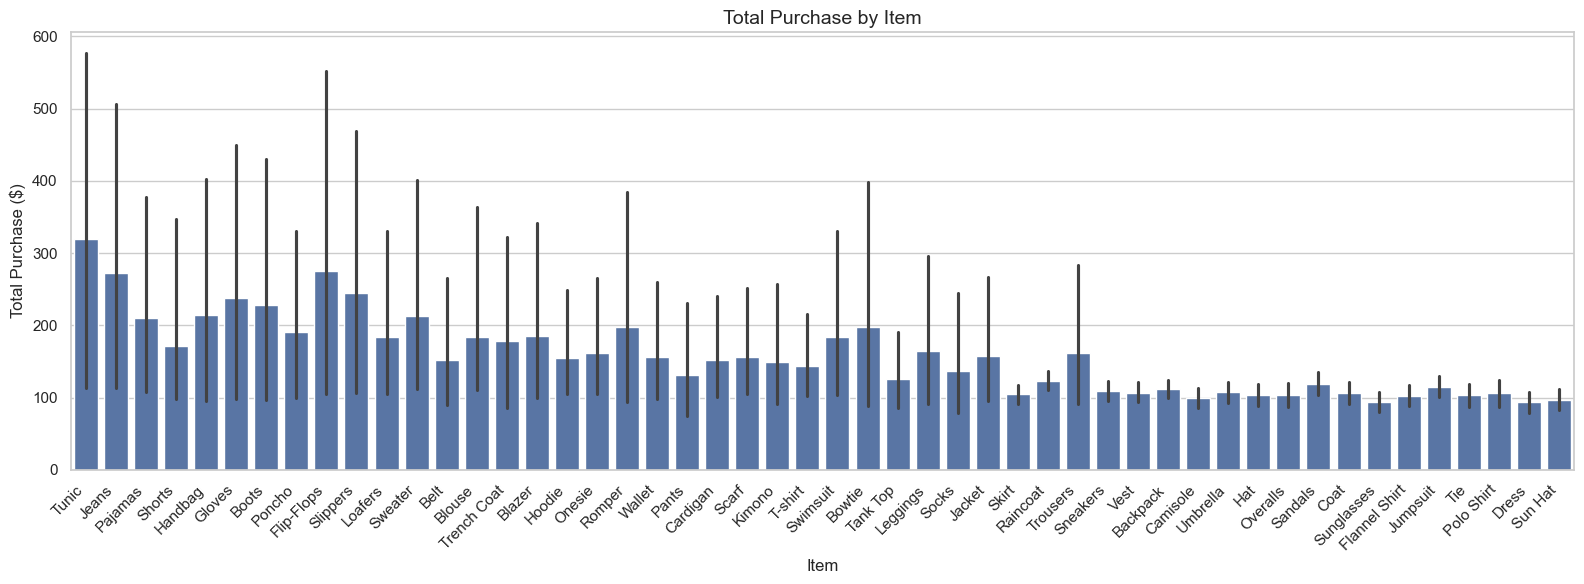

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Purchases by Item - Sorted & Spaced
plt.figure(figsize=(16, 6))  # Wider figure for better spacing

# Sort items by total purchase
item_order = df.groupby('Item Purchased')['Total Purchase'].sum().sort_values(ascending=False).index

sns.barplot(data=df, x='Item Purchased', y='Total Purchase', order=item_order)
plt.title('Total Purchase by Item', fontsize=14)
plt.ylabel('Total Purchase ($)', fontsize=12)
plt.xlabel('Item', fontsize=12)
plt.xticks(rotation=45, ha='right')  # better angle and alignment
plt.tight_layout()
plt.show()


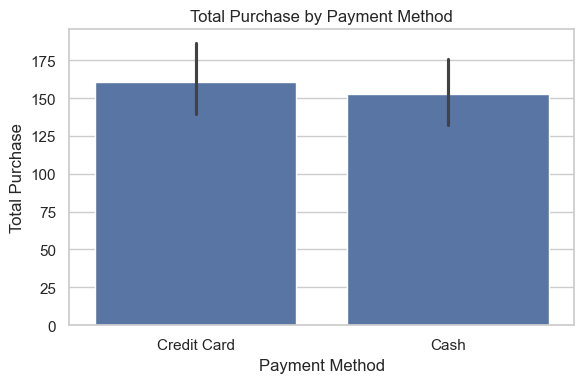

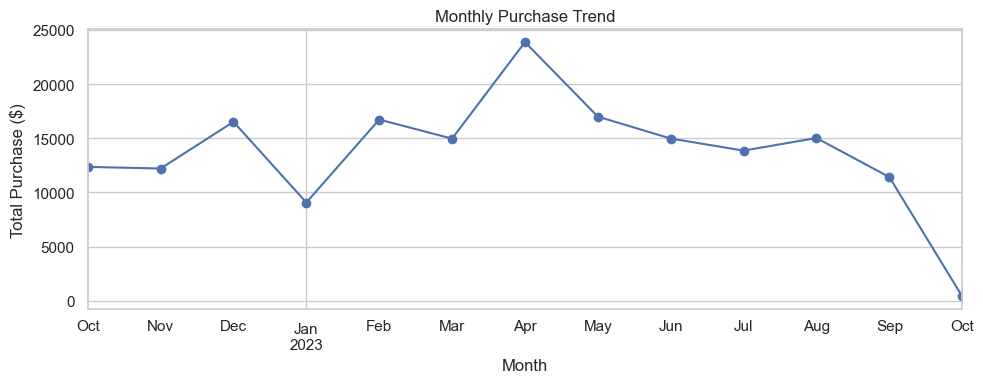

In [18]:
# Total Purchase by Payment Method
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Payment Method', y='Total Purchase')
plt.title('Total Purchase by Payment Method')
plt.tight_layout()
plt.show()

# Purchase trend over time (monthly)
df['Month'] = df['Date Purchase'].dt.to_period('M')
monthly_trend = df.groupby('Month')['Total Purchase'].sum()

monthly_trend.plot(kind='line', marker='o', figsize=(10,4), title='Monthly Purchase Trend')
plt.ylabel('Total Purchase ($)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()
